MLP(
  (hidden_1): Linear(in_features=784, out_features=500)
  (hidden_2): Linear(in_features=500, out_features=250)
  (output): Linear(in_features=250, out_features=10)
)
epoch = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Variable containing:
 2.3019
[torch.FloatTensor of size 1]

epoch = 1
Variable containing:
 2.3020
[torch.FloatTensor of size 1]

epoch = 2
Variable containing:
 2.3017
[torch.FloatTensor of size 1]

epoch = 3
Variable containing:
 2.3016
[torch.FloatTensor of size 1]

epoch = 4
Variable containing:
 2.3019
[torch.FloatTensor of size 1]

epoch = 5
Variable containing:
 2.3018
[torch.FloatTensor of size 1]

epoch = 6
Variable containing:
 2.3017
[torch.FloatTensor of size 1]

epoch = 7
Variable containing:
 2.3017
[torch.FloatTensor of size 1]

epoch = 8
Variable containing:
 2.3017
[torch.FloatTensor of size 1]

epoch = 9
Variable containing:
 2.3018
[torch.FloatTensor of size 1]

epoch = 0
Variable containing:
 29.7349
[torch.FloatTensor of size 1]

epoch = 1
Variable containing:
 2.2899
[torch.FloatTensor of size 1]

epoch = 2
Variable containing:
 2.2986
[torch.FloatTensor of size 1]

epoch = 3
Variable containing:
 2.2987
[torch.FloatTensor of size 1]

epoch = 4
Variable containing

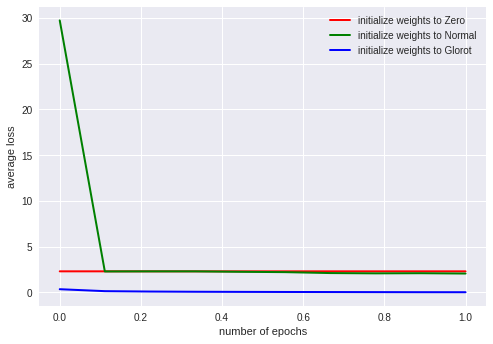

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plot
import numpy as np

# hyper parameters
train_num = 50000
batch_size = 40
epochs = 10
learning_rate = 1e-2
momentum = 0.9
average_loss =Variable(torch.zeros(epochs, 3))


# download mnist dataset
train_dataset = datasets.MNIST(root = './MNIST', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = datasets.MNIST(root = './MNIST', train = False, transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(
										   dataset = train_dataset, 
										   batch_size = batch_size,
										   shuffle = True)
test_loader = torch.utils.data.DataLoader(	
										   dataset = test_dataset,
										   batch_size = batch_size,
										   shuffle = False)

# MLP network with two hidden layers
# input: features
# n_hidden_1: total number of first hidden layer units
# n_hidden_2: total number of second hidden layer units
# output: output
class MLP(nn.Module):
	def __init__(self, input, n_hidden_1, n_hidden_2, output):
		super(MLP, self).__init__()
		self.hidden_1 = nn.Linear(input, n_hidden_1)
		self.hidden_2 = nn.Linear(n_hidden_1, n_hidden_2)
		self.output = nn.Linear(n_hidden_2, output)

	def forward(self, x):
		x = F.relu(self.hidden_1(x))
		x = F.relu(self.hidden_2(x))
		return F.log_softmax(self.output(x))

# input dimensions
model = MLP(28*28, 500, 250, 10)
print (model)

# initialize bias
nn.init.constant(model.hidden_1.bias, 0)
nn.init.constant(model.hidden_2.bias, 0)
nn.init.constant(model.output.bias, 0)

if torch.cuda.is_available():
	model = model.cuda()

optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum= momentum)
loss_function = nn.CrossEntropyLoss()

# 3 methods to initialize weights
for init in range(3):
	# initialize weights to Zero
	if init == 0:
		nn.init.constant(model.hidden_1.weight, 0)
		nn.init.constant(model.hidden_2.weight, 0)
		nn.init.constant(model.output.weight, 0)

	# initialize weights to Normal
	elif init == 1:
		nn.init.normal(model.hidden_1.weight, mean = 0, std = 1)
		nn.init.normal(model.hidden_2.weight, mean = 0, std = 1)
		nn.init.normal(model.output.weight, mean = 0, std = 1)
	
	# initialize weights to Glorot
	else:
		nn.init.xavier_uniform(model.hidden_1.weight, gain = 1)
		nn.init.xavier_uniform(model.hidden_2.weight, gain = 1)
		nn.init.xavier_uniform(model.output.weight, gain = 1)

	# iterations in epochs
	for epoch in range(epochs):
		print('epoch = %d' % epoch)
		loss = 0

		for batch_index, (images, labels) in enumerate(train_loader):
			# set initial gradient to Zero firstly
			optimizer.zero_grad()
			
			if torch.cuda.is_available():
				images = images.cuda()
				labels = labels.cuda()
			
			images = Variable(images.view(-1, 28*28))
			labels = Variable(labels)

			# train dataset with 50000 training samples
			if (batch_index*batch_size ) < train_num:
				prediction = model(images)
				loss = loss_function(prediction, labels)
				average_loss[epoch, init] = average_loss[epoch, init] + loss.data[0]


				loss.backward()
				optimizer.step()

				# print 10 loss value of each epoch
				#if (10 * batch_index) % (train_num / batch_size) == 0:
					#print('current loss = %.5f' % loss.data[0])



		average_loss[epoch, init] = average_loss[epoch, init] / (train_num / batch_size)
		print(average_loss[epoch, init])

			
x_axis = np.linspace(0, 1, 10)
plot.plot(x_axis, average_loss.data.numpy()[:,0], label = 'initialize weights to Zero', color ='r', lw=2)
plot.plot(x_axis, average_loss.data.numpy()[:,1], label = 'initialize weights to Normal', color = 'g', lw=2)
plot.plot(x_axis, average_loss.data.numpy()[:,2], label = 'initialize weights to Glorot', color = 'b', lw=2)
plot.xlabel("number of epochs")
plot.ylabel("average loss")
plot.legend()
plot.show()

